### PACKETBEAT

In [21]:
import pandas as pd

df = pd.read_csv('data/data_packetbeat.csv', low_memory=False)

df = df.dropna(axis=1, how = 'all')
#df = df.drop(['@version','network.direction', 'dns.type', '_type', 'client.bytes','dns.answers_count', 'dns.authorities_count','dns.flags.authentic_data', 'client.ip', 'client.port','server.bytes', 'server.ip', 'server.port', '_id', '_index', '_type', 'agent.ephemeral_id', 'agent.hostname', 'agent.id', 'agent.version', 'cloud.account.id', 'cloud.availability_zone', 'cloud.image.id', 'cloud.instance.id', 'cloud.machine.type', 'cloud.provider', 'cloud.region', 'ecs.version', 'event.kind', 'host.architecture', 'host.containerized', 'host.os.name', 'host.os.platform', 'dns.additionals_count', 'dns.flags.authoritative', 'dns.flags.checking_disabled', 'dns.flags.recursion_available', 'dns.flags.recursion_desired','dns.flags.truncated_response','dns.header_flags', 'dns.id', 'query', 'resource', 'dns.question.class', 'dns.question.etld_plus_one', 'dns.question.name', 'network.protocol', 'dns.op_code', 'dns.question.registered_domain', 'dns.question.type','dns.response_code', 'status', 'event.action', 'event.category', 'tags', 'type', 'network.type', 'host.hostname', 'host.name', 'host.os.codename', 'host.os.family','host.os.kernel', 'host.os.version', 'method', 'flow.id', 'network.community_id', 'flow.final'], axis=1)
df = df[['@timestamp', 'source.bytes', 'source.packets','destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'network.transport', 'event.duration']]

df = df.sort_values(by='@timestamp')
df = df.reset_index()
del df['index']

df = df[['source.bytes', 'source.packets','destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'network.transport', 'event.duration']]
df = df.dropna()

In [22]:
df['event.duration'] = df['event.duration'].str.replace(',', '')
var = ['source.bytes', 'destination.bytes', 'network.bytes', 'network.packets']
import pandas as pd
#var = ['source.bytes']

for var in var:
    #for i in range(0, len(df)):
    df[var] = df[var].str.replace(',', '').astype(float)    

In [23]:
df['network.transport'].value_counts()

tcp     6318
udp     5006
icmp       5
Name: network.transport, dtype: int64

In [24]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['network.transport'] = le.fit_transform(df['network.transport'].values)
df = df.reset_index()
del df['index']
df

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,network.transport,event.duration
0,92.0,1.0,92.0,1.0,2.0,184.0,2,52203
1,11568.0,168.0,147932.0,159.0,327.0,159500.0,1,4319744195010
2,1736.0,13.0,2289.0,10.0,23.0,4025.0,1,4096005300
3,1848.0,15.0,2289.0,10.0,25.0,4137.0,1,6143909439
4,1792.0,14.0,2289.0,10.0,24.0,4081.0,1,6143951873
...,...,...,...,...,...,...,...,...
11324,1792.0,14.0,2289.0,10.0,24.0,4081.0,1,4096030614
11325,1680.0,12.0,2289.0,10.0,22.0,3969.0,1,3071949618
11326,112.0,2.0,56.0,1.0,3.0,168.0,1,76843
11327,92.0,1.0,92.0,1.0,2.0,184.0,2,34619


### DBSCAN algorithm

In [25]:
from sklearn.preprocessing import StandardScaler

column = df['network.transport']
X = df
standarized = StandardScaler().fit_transform(X[['source.bytes', 'source.packets', 'destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'event.duration']])
standarized = pd.DataFrame(standarized, columns = ['source.bytes', 'source.packets', 'destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'event.duration'])
standarized.insert(7, 'network.transport', column)
standarized

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,event.duration,network.transport
0,-0.163834,-0.300092,-0.236147,-0.305381,-0.303626,-0.238985,-0.222494,2
1,-0.055425,1.634066,2.913824,2.003957,1.804695,1.100406,2.882590,1
2,-0.148304,-0.161110,-0.189336,-0.173837,-0.167396,-0.206693,-0.219550,1
3,-0.147246,-0.137947,-0.189336,-0.173837,-0.154421,-0.205751,-0.218078,1
4,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.218078,1
...,...,...,...,...,...,...,...,...
11324,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.219550,1
11325,-0.148833,-0.172692,-0.189336,-0.173837,-0.173883,-0.207164,-0.220286,1
11326,-0.163645,-0.288510,-0.236914,-0.305381,-0.297138,-0.239119,-0.222494,1
11327,-0.163834,-0.300092,-0.236147,-0.305381,-0.303626,-0.238985,-0.222494,2


In [26]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs


In [27]:
X = standarized
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 5
Estimated number of noise points: 159


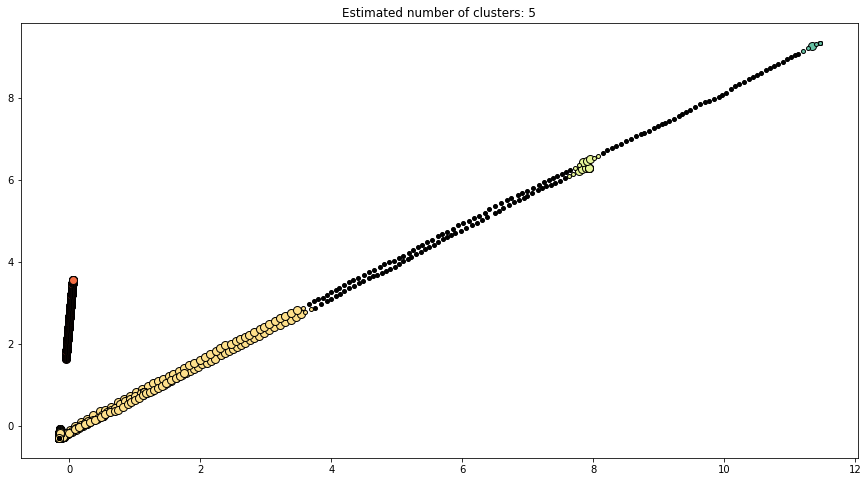

In [28]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(15,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
   
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [29]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.845


### Other, DBSCAN
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf

In [56]:
from sklearn.cluster import DBSCAN
Y = standarized[['source.bytes', 'source.packets','destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'event.duration', 'network.transport']]
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(Y)

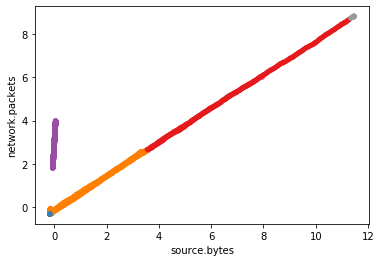

In [65]:
from matplotlib import cm
cmap = cm.get_cmap('Set1')
Y.plot.scatter(x='source.bytes', y='network.packets', c=clusters, cmap=cmap, colorbar = False)

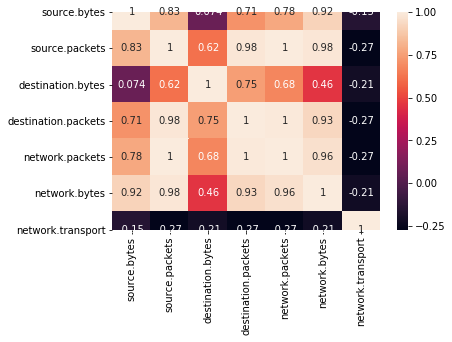

In [32]:
import seaborn as sn

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [33]:
tcp = standarized.loc[standarized['network.transport'] == 1]
tcp = tcp.reset_index()
del tcp['index']
tcp

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,event.duration,network.transport
0,-0.055425,1.634066,2.913824,2.003957,1.804695,1.100406,2.882590,1
1,-0.148304,-0.161110,-0.189336,-0.173837,-0.167396,-0.206693,-0.219550,1
2,-0.147246,-0.137947,-0.189336,-0.173837,-0.154421,-0.205751,-0.218078,1
3,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.218078,1
4,-0.148304,-0.161110,-0.189336,-0.173837,-0.167396,-0.206693,-0.219918,1
...,...,...,...,...,...,...,...,...
6313,-0.147775,-0.149529,-0.188143,-0.159221,-0.154421,-0.205751,-0.218078,1
6314,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.219550,1
6315,-0.148833,-0.172692,-0.189336,-0.173837,-0.173883,-0.207164,-0.220286,1
6316,-0.163645,-0.288510,-0.236914,-0.305381,-0.297138,-0.239119,-0.222494,1


In [34]:
X = tcp
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 154


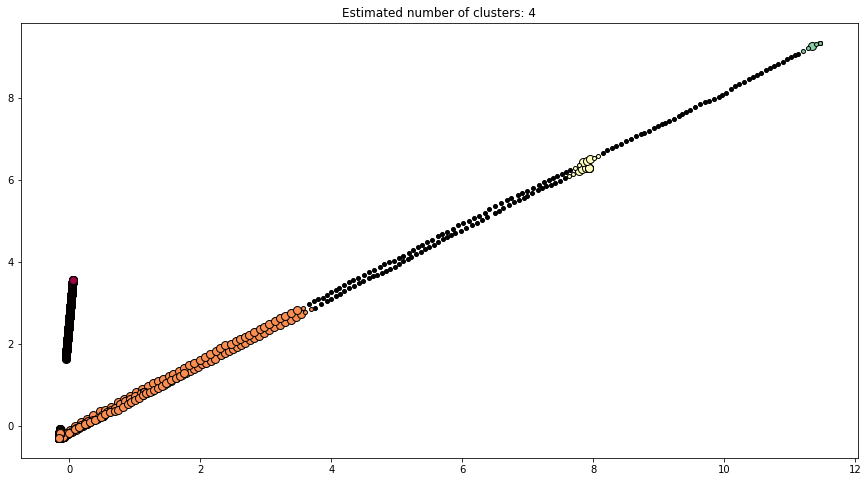

In [35]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(15,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
   
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = standarized 
X_train, X_test= train_test_split(X, test_size=0.33, random_state=42)

In [37]:
X_train = X_train.reset_index()
del X_train['index']
X_train

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,event.duration,network.transport
0,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.219915,1
1,-0.163853,-0.300092,-0.234314,-0.305381,-0.303626,-0.238278,-0.222494,2
2,-0.163645,-0.288510,-0.236914,-0.305381,-0.297138,-0.239119,-0.222126,1
3,-0.163853,-0.300092,-0.234314,-0.305381,-0.303626,-0.238278,-0.222494,2
4,-0.146490,-0.137947,-0.176637,-0.100757,-0.121986,-0.200068,-0.216238,1
...,...,...,...,...,...,...,...,...
7585,-0.163853,-0.300092,-0.234314,-0.305381,-0.303626,-0.238278,-0.222494,2
7586,-0.163645,-0.288510,-0.236914,-0.305381,-0.297138,-0.239119,-0.222494,1
7587,0.005109,2.711173,4.831676,3.377867,3.017791,1.911022,4.801875,1
7588,-0.163834,-0.300092,-0.236147,-0.305381,-0.303626,-0.238985,-0.222494,2


In [38]:
X_test = X_test.reset_index()
del X_test['index']
X_test

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,event.duration,network.transport
0,-0.163645,-0.288510,-0.236914,-0.305381,-0.297138,-0.239119,-0.222126,1
1,-0.148304,-0.161110,-0.189336,-0.173837,-0.167396,-0.206693,-0.218446,1
2,-0.163853,-0.300092,-0.234314,-0.305381,-0.303626,-0.238278,-0.222494,2
3,-0.147775,-0.149529,-0.189336,-0.173837,-0.160908,-0.206222,-0.217710,1
4,-0.163834,-0.300092,-0.236147,-0.305381,-0.303626,-0.238985,-0.222494,2
...,...,...,...,...,...,...,...,...
3734,-0.164137,-0.300092,-0.236914,-0.305381,-0.303626,-0.239556,-0.222494,1
3735,-0.147246,-0.137947,-0.188143,-0.159221,-0.147934,-0.205280,-0.219918,1
3736,-0.148304,-0.161110,-0.188143,-0.159221,-0.160908,-0.206222,-0.219550,1
3737,-0.164174,-0.300092,-0.236914,-0.305381,-0.303626,-0.239590,-0.222494,1


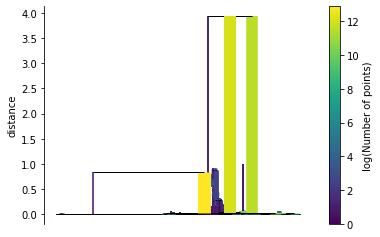

In [40]:
import hdbscan
from sklearn.datasets import make_blobs

data = X_train

clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()

In [50]:
import seaborn as sns
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(data)
pal = sns.color_palette('deep', 8)
#colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=cmap, **plot_kwds);

NameError: name 'plot_kwds' is not defined

TypeError: '(array([False,  True, False, ..., False, False,  True]), 0)' is an invalid key

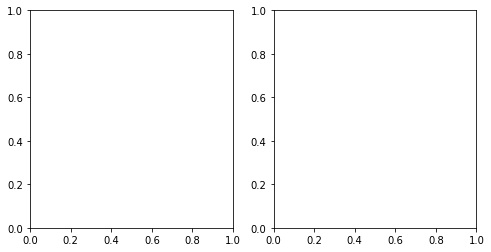

In [47]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
hdb_unique_labels = set(hdb_labels)
db_unique_labels = set(db_labels)
hdb_colors = plt.cm.Spectral(np.linspace(0, 1, len(hdb_unique_labels)))
db_colors = plt.cm.Spectral(np.linspace(0, 1, len(db_unique_labels)))
fig = plt.figure(figsize=plt.figaspect(0.5))
hdb_axis = fig.add_subplot('121')
db_axis = fig.add_subplot('122')
for k, col in zip(hdb_unique_labels, hdb_colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    hdb_axis.plot(X[hdb_labels == k, 0], X[hdb_labels == k, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
for k, col in zip(db_unique_labels, db_colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    db_axis.plot(X[db_labels == k, 0], X[db_labels == k, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k', markersize=6)

hdb_axis.set_title('HDBSCAN\nEstimated number of clusters: %d' % n_clusters_hdb_)
db_axis.set_title('DBSCAN\nEstimated number of clusters: %d' % n_clusters_db_)
plt.show()